In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cardekho1.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,130000


In [3]:
df.isnull().sum()

name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
selling_price           0
dtype: int64

In [4]:
df.shape

(8128, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  7907 non-null   float64
 8   engine              7907 non-null   float64
 9   max_power           7913 non-null   object 
 10  seats               7907 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [6]:
df.describe()

,year,km_driven,mileage(km/ltr/kg),engine,seats,selling_price
count,8128.000000,8.128000e+03,7907.000000,7907.000000,7907.000000,8.128000e+03
mean,2013.804011,6.981951e+04,19.418783,1458.625016,5.416719,6.382718e+05
std,4.044249,5.655055e+04,4.037145,503.916303,0.959588,8.062534e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,2.000000,2.999900e+04
25%,2011.000000,3.500000e+04,16.780000,1197.000000,5.000000,2.549990e+05
50%,2015.000000,6.000000e+04,19.300000,1248.000000,5.000000,4.500000e+05
75%,2017.000000,9.800000e+04,22.320000,1582.000000,5.000000,6.750000e+05
max,2020.000000,2.360457e+06,42.000000,3604.000000,14.000000,1.000000e+07


# Removing null values

In [8]:
null_precentage = df.isnull().mean()*100
print(null_precentage)

name                  0.000000
year                  0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
selling_price         0.000000
dtype: float64


In [9]:
df.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [10]:
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())

In [11]:
df["mileage(km/ltr/kg)"].isnull().sum()

0

In [12]:
df["engine"] = df["engine"].fillna(df["engine"].mean())
df["engine"].isnull().sum()

0

In [13]:
df["seats"].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

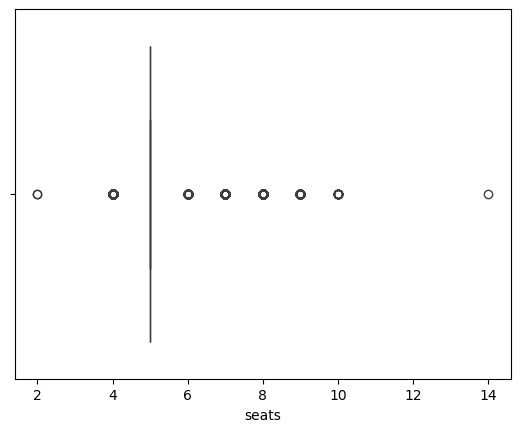

In [14]:
sns.boxplot(x = df["seats"])
plt.show()

In [15]:
(df["seats"] > 8).sum()

100

In [16]:
df.query(" seats == 14").head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
4575,Tata Winger Deluxe - Flat Roof (Non-AC),2010,50000,Diesel,Individual,Manual,First Owner,10.71,1948.0,90,14.0,235000


In [17]:
df["seats"] = df["seats"].fillna(df["seats"].mode()[0])
df["seats"].isnull().sum()

0

In [18]:
df["max_power"].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [19]:
# Removing non-numeric characters and convert to float
df['max_power'] = pd.to_numeric(df['max_power'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')

In [20]:
df["max_power"].dtype

dtype('float64')

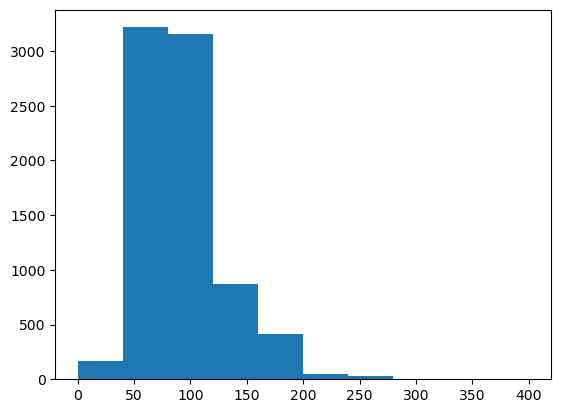

In [21]:
plt.hist(df["max_power"])
plt.show()

In [22]:
df["max_power"].mean() , df["max_power"].mode()

(91.51791898382203,
 0    74.0
 Name: max_power, dtype: float64)

In [23]:
df["max_power"] = df["max_power"].fillna(df["max_power"].mean())

In [24]:
df.isnull().sum()

name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
selling_price         0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   float64
 10  seats               8128 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [26]:
df.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000


### Done filling values

# Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Use One-Hot Encoding for nominal data (no order) and Use Label Encoding for ordinal data (has order).

### Name Encoding

In [32]:
cname_enco = LabelEncoder()
df["name"] = cname_enco.fit_transform(df["name"])

In [33]:
df.head(2)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,1307,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,1607,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000


### Fuel Encoding

In [35]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [36]:
fuel_enco = LabelEncoder()
df["fuel"] = fuel_enco.fit_transform(df["fuel"])

In [37]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,1307,2014,145500,1,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,1607,2014,120000,1,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,385,2006,140000,3,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,781,2010,127000,1,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,1349,2007,120000,3,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


In [38]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

### Seller Encoding

In [40]:
seller_le = LabelEncoder()
df["seller_type"] = seller_le.fit_transform(df["seller_type"])

In [41]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,1307,2014,145500,1,1,Manual,First Owner,23.40,1248.0,74.00,5.0,450000
1,1607,2014,120000,1,1,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,385,2006,140000,3,1,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000
3,781,2010,127000,1,1,Manual,First Owner,23.00,1396.0,90.00,5.0,225000
4,1349,2007,120000,3,1,Manual,First Owner,16.10,1298.0,88.20,5.0,130000


### Transmission Encoding

In [43]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [44]:
transmission_le = LabelEncoder()
df["transmission"] = transmission_le.fit_transform(df["transmission"])

### Owner Encoding

In [46]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [47]:
owner_le = LabelEncoder()
df["owner"] = owner_le.fit_transform(df["owner"])

In [48]:
df.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,1307,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000
1,1607,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000
2,385,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000


# Converted every data into numerical

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   int32  
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   int32  
 4   seller_type         8128 non-null   int32  
 5   transmission        8128 non-null   int32  
 6   owner               8128 non-null   int32  
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   float64
 10  seats               8128 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 603.4 KB


### There is no linear relationship in dataset

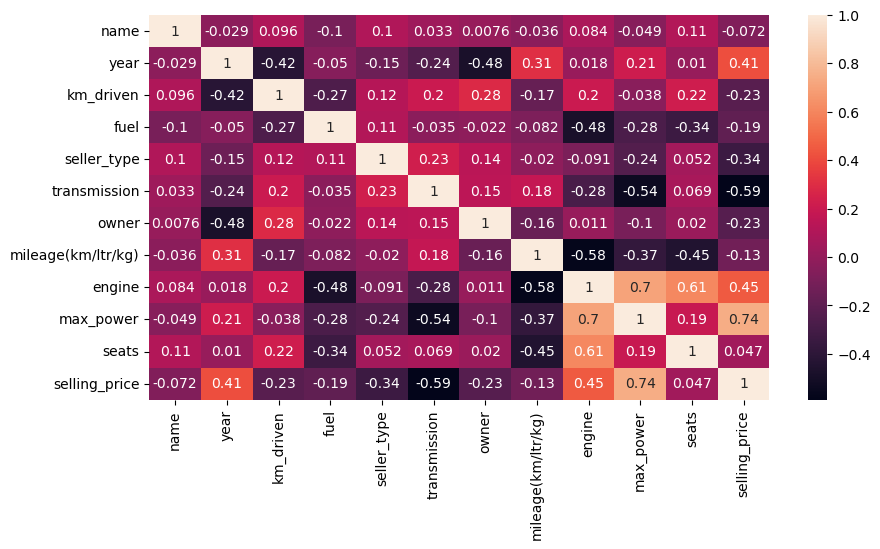

In [52]:
plt.figure(figsize = (10,5))
sns.heatmap(data = df.corr(),annot=True)
plt.show()

# I am considering outliers in this dataset because there can be cars with high prices than others and seats more than other cars 

# So i prefer not to remove them

# Now splitting the dataset into input and output

In [56]:
input = df.iloc[:,:-1]
output = df["selling_price"]

# Scalling 

In [58]:
from sklearn.preprocessing import StandardScaler

### We should not transform our output data

In [60]:
ss = StandardScaler()
ss.fit_transform(input)

array([[ 0.45470988,  0.04846419,  1.33836255, ..., -0.42380393,
        -0.49568159, -0.42725761],
       [ 1.0011203 ,  0.04846419,  0.88741086, ...,  0.0792274 ,
         0.33960716, -0.42725761],
       [-1.2245915 , -1.9297752 ,  1.24109846, ...,  0.07721528,
        -0.38249884, -0.42725761],
       ...,
       [ 0.47656629, -1.18793543,  0.88741086, ..., -0.42380393,
        -0.49851116, -0.42725761],
       [ 1.16868617, -0.19881574, -0.79260528, ..., -0.12600938,
        -0.60886435, -0.42725761],
       [ 1.16868617, -0.19881574, -0.79260528, ..., -0.12600938,
        -0.60886435, -0.42725761]])

In [61]:
input = pd.DataFrame(ss.fit_transform(input),columns=input.columns)

In [62]:
input.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258
1,1.001120,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.432289,0.079227,0.339607,-0.427258
2,-1.224592,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.431678,0.077215,-0.382499,-0.427258


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(input,output,random_state=42,test_size=0.2)

# Supervised-Learning Models

In [66]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , root_mean_squared_error

## Checking Accuracy for each model 

In [68]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
lr1.score(x_train,y_train)*100 , lr1.score(x_test,y_test)*100

(67.70859190561598, 68.69142815236486)

In [69]:
lr2 = Lasso(alpha=0.2)
lr2.fit(x_train,y_train)
lr2.score(x_train,y_train)*100 , lr2.score(x_test,y_test)*100

(67.70859190555363, 68.6914260529667)

In [70]:
lr3 = Ridge(alpha=0.05)
lr3.fit(x_train,y_train)
lr3.score(x_train,y_train)*100 , lr3.score(x_test,y_test)*100

(67.70859190204067, 68.6914192997333)

In [71]:
lr4 = ElasticNet(alpha=0.1)
lr4.fit(x_train,y_train)
lr4.score(x_train,y_train)*100 , lr4.score(x_test,y_test)*100

(67.6032642064104, 68.52997621877839)

### The Linear Models are not giving good Accuracy so i will go for other models

In [73]:
dt = DecisionTreeRegressor(max_depth = 45)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(99.98570167753937, 92.48405639960977)

In [74]:
mean_absolute_error(y_test,dt.predict(x_test)) , mean_squared_error(y_test,dt.predict(x_test)) , root_mean_squared_error(y_test,dt.predict(x_test))

(80603.08111773425, 49265840850.148476, 221959.0972457504)

### The error values are high because i considered the outliers so it is high so we can just ignore that

In [75]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100 , rf.score(x_test,y_test)*100

(99.55661766724215, 97.03256653887887)

In [160]:
rf1 = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=5,min_samples_leaf=2,max_features="sqrt")
rf1.fit(x_train,y_train)
rf1.score(x_train,y_train)*100 , rf1.score(x_test,y_test)*100

(98.29179054666496, 96.65344836634847)

In [162]:
mean_absolute_error(y_test,rf1.predict(x_test)) , mean_squared_error(y_test,rf1.predict(x_test)) , root_mean_squared_error(y_test,rf1.predict(x_test))

(70010.91025350915, 21936125248.694103, 148108.49148071863)

In [76]:
mean_absolute_error(y_test,rf.predict(x_test)) , mean_squared_error(y_test,rf.predict(x_test)) , root_mean_squared_error(y_test,rf.predict(x_test))

(65276.02516578158, 19451064617.01076, 139467.07359448954)

### Random Forest Regressor gave a perfect accuracy for us but i will still check other models just in case

In [78]:
svr = SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100 , svr.score(x_test,y_test)*100
# Worst accuracy so far

(-5.455340476748094, -5.288082041695197)

In [79]:
knn = KNeighborsRegressor(n_neighbors=1,p=1)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100 ,knn.score(x_test,y_test)*100

(99.9753809365187, 96.15812234566847)

In [80]:
for i in range(2,10):
    knn1 = KNeighborsRegressor(n_neighbors=i)
    knn1.fit(x_train,y_train)
    print(i , knn1.score(x_train,y_train)*100 , knn1.score(x_test,y_test)*100)

2 98.38850883517033 95.48192489195306
3 97.12514953339434 94.79369853881731
4 96.3153272422463 94.94365662774355
5 95.64431989517223 95.04500694050631
6 94.9656494118135 94.8087238411387
7 94.33238988557858 94.51824214550064
8 93.86480460060521 94.26559343909095
9 93.54586399568744 93.88453040137414


### Both RandomForest and KNN gave good accuracy

In [82]:
# from sklearn.model_selection import GridSearchCV

In [83]:
# param_grid = {
#    'n_estimators': [50, 100, 200],
 #  'min_samples_split': [2, 5, 10],
  #  'min_samples_leaf': [1, 2, 4],
   # 'max_features': ['auto', 'sqrt']
# }

In [84]:
# rf1 = RandomForestRegressor(random_state=42)

In [85]:
# gs = GridSearchCV(estimator=rf1, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# gs.fit(x_train, y_train)

### trying CV

In [164]:
from sklearn.model_selection import cross_val_score,KFold

In [166]:
cvs = cross_val_score(RandomForestRegressor(),x_train,y_train,cv= KFold(n_splits=10))

In [170]:
cvs.sort()
cvs

array([0.9293455 , 0.94123782, 0.95283655, 0.96433027, 0.96517407,
       0.97492814, 0.98004806, 0.98090948, 0.98132419, 0.98560269])

In [172]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5)

array([0.9439178 , 0.9763843 , 0.96758728, 0.97179397, 0.96224777])

### trying Voting

In [176]:
from sklearn.ensemble import VotingRegressor

In [180]:
li = [("dt1",DecisionTreeRegressor()),("rf1",RandomForestRegressor()),("knr1",KNeighborsRegressor())]

In [182]:
vr = VotingRegressor(li)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('dt1', DecisionTreeRegressor()),
                            ('rf1', RandomForestRegressor()),
                            ('knr1', KNeighborsRegressor())])

In [184]:
vr.score(x_train,y_train)*100 , vr.score(x_test,y_test)*100

(99.24621487027584, 97.08839450458272)

# Bagging

In [189]:
from sklearn.ensemble import BaggingRegressor

In [191]:
bgr = BaggingRegressor(estimator=RandomForestRegressor(),n_estimators=30)
bgr.fit(x_train,y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=30)

In [193]:
bgr.score(x_train,y_train)*100 , bgr.score(x_test,y_test)*100

(98.611208266135, 96.75908969408356)

# Now we got so many Models with good accuracy, We can select any one of them for our prediction

In [197]:
d = {"RandomForest" : [99.55661766724215,97.03256653887887],"RandomForest1": [98.29179054666496,96.65344836634847],"VR":[99.24621487027584, 97.08839450458272],"Bagging":[98.611208266135, 96.75908969408356]}
d = pd.DataFrame(d)
d

,RandomForest,RandomForest1,VR,Bagging
0,99.556618,98.291791,99.246215,98.611208
1,97.032567,96.653448,97.088395,96.759090


## Lets check few predictions of models

In [202]:
input.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258
1,1.001120,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.432289,0.079227,0.339607,-0.427258
2,-1.224592,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.431678,0.077215,-0.382499,-0.427258


In [204]:
rf.predict([[0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([470969.84])

In [213]:
output.head(1)

0    450000
Name: selling_price, dtype: int64

## Its almost close so it is a good model , we cannot expect a 100% accurate model from ML , Little close values are perfect Models

In [211]:
rf1.predict([[0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([483829.28056849])

#### rf was better 

In [216]:
vr.predict([[0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([444877.43666667])

In [218]:
output.head(1)

0    450000
Name: selling_price, dtype: int64

### Voting regressor was almost perfectly close, i will finally select the VR as the Model 

In [221]:
bgr.predict([[0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258]])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([475575.45533766])

### Now the data will be given in the mixture of object,int and float values, like starting data

### this process is done after completing the entire model selection process

In [261]:
new_data = pd.DataFrame([["Maruti Swift Dzire VDI",2014,145500,"Diesel","Individual","Manual","First Owner",23.40,1248.0,74,5.0	]],columns=x_train.columns)

In [263]:
new_data

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74,5.0


### Now we need to transform the data to make predictions

#### With the help of encoding models we created 

In [267]:
new_data["name"] = cname_enco.transform(new_data["name"])

In [269]:
new_data["fuel"] = fuel_enco.transform(new_data["fuel"])

In [271]:
new_data["seller_type"] = seller_le.transform(new_data["seller_type"])

In [273]:
new_data["transmission"] = transmission_le.transform(new_data["transmission"])

In [275]:
new_data["owner"] = owner_le.transform(new_data["owner"])

In [277]:
new_data

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1307,2014,145500,1,1,1,0,23.4,1248.0,74,5.0


### Now scale the data

In [280]:
new_data = pd.DataFrame(ss.transform(new_data),columns=new_data.columns)

In [282]:
new_data

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,0.45471,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,0.999896,-0.423804,-0.495682,-0.427258


In [284]:
vr.predict(new_data)

array([447777.44666667])

In [286]:
output.head(1)

0    450000
Name: selling_price, dtype: int64

# Perfectly close to the original price

# The End